In [1]:
import yfinance as yf

from fredapi import Fred
fred = Fred(api_key='28aeba1640db3381603377e03a5b6220')#https://github.com/mortada/fredapi

In [2]:
import pandas as pd
import numpy as np

In [93]:
gold=pd.read_csv('gold.csv',index_col=0)
gold

,GOLD
DATE,
1968-04-01,38
1968-04-02,37.6
1968-04-03,37.7
1968-04-04,36.7
1968-04-05,37.2
...,...
2021-03-31,1685.35
2021-04-01,1715.85
2021-04-02,.


In [94]:
T10Y2Y = fred.get_series('T10Y2Y')
NASDAQ = fred.get_series('NASDAQCOM')
DGS30 = fred.get_series('DGS30')
DOWJONES = fred.get_series('WILL5000PR')


In [95]:
data=pd.concat([data, gold])
data

,T10Y2Y,NASDAQ,DGS30,DOWJONES,GOLD
1980-01-04 00:00:00,-0.81,148.02,10.34,1092.66,NaN
1980-01-07 00:00:00,-0.72,148.62,10.35,1097.18,NaN
1980-01-08 00:00:00,-0.69,150.68,10.28,1118.44,NaN
1980-01-09 00:00:00,-0.66,151.60,10.29,1120.14,NaN
1980-01-10 00:00:00,-0.67,153.12,10.26,1129.91,NaN
...,...,...,...,...,...
2021-03-31,NaN,NaN,NaN,NaN,1685.35
2021-04-01,NaN,NaN,NaN,NaN,1715.85
2021-04-02,NaN,NaN,NaN,NaN,.
2021-04-05,NaN,NaN,NaN,NaN,.


In [91]:
data=pd.DataFrame({'T10Y2Y':T10Y2Y,'NASDAQ':NASDAQ,'DGS30':DGS30,'DOWJONES':DOWJONES})
data=pd.
data=data[2351:]
data=data.dropna(axis=0,how='all')
data=data.interpolate()

In [79]:
data

,T10Y2Y,NASDAQ,DGS30,DOWJONES
1980-01-04,-0.81,148.02,10.34,1092.66
1980-01-07,-0.72,148.62,10.35,1097.18
1980-01-08,-0.69,150.68,10.28,1118.44
1980-01-09,-0.66,151.60,10.29,1120.14
1980-01-10,-0.67,153.12,10.26,1129.91
...,...,...,...,...
2021-03-31,1.58,13246.87,2.41,41465.83
2021-04-01,1.52,13480.11,2.34,41994.53
2021-04-02,1.53,13592.85,2.35,42264.87
2021-04-05,1.56,13705.59,2.36,42535.21


In [80]:
data.to_csv('data.csv')

In [5]:
crude_oil=yf.download('USO',start='2006-11-01')#https://m.blog.naver.com/4merica/221315537221
gold=yf.download('GLD',start='2006-11-01')
silver=yf.download('SI=F',start='2006-11-01')
sp_500=yf.download('SPY',start='2006-11-01')
nasdaq=yf.download('QQQ',start='2006-11-01')
#treasury_10=yf.download('^TNX',start='2006-11-01')
dividened=yf.download('VYM',start='2006-11-01')#16일 시작임
bond=yf.download('IEF',start='2006-11-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


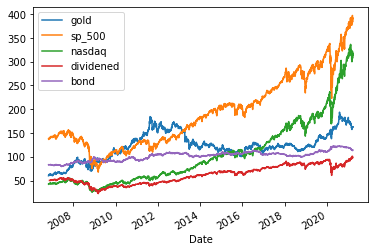

In [52]:
data.plot()

In [76]:
def fnRSI(m_Df, m_N):

    U = np.where(m_Df.diff(1) > 0, m_Df.diff(1), 0)
    D = np.where(m_Df.diff(1) < 0, m_Df.diff(1) *(-1), 0)

    AU = pd.DataFrame(U).rolling( window=m_N, min_periods=m_N).mean()
    AD = pd.DataFrame(D).rolling( window=m_N, min_periods=m_N).mean()
    RSI = AU.div(AD+AU) *100
    return RSI

In [80]:
fnRSI(data['gold'],14).head(50) #30 이하 매수 70 이상 매도

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [109]:
df=pd.read_csv('data.csv',index_col=0)

In [110]:
df

,T10Y2Y,NASDAQ,DGS30,DOWJONES,GOLD
DATE,,,,,
1980-01-04,-0.81,148.02,10.34,1092.66,596.00
1980-01-07,-0.72,148.62,10.35,1097.18,634.00
1980-01-08,-0.69,150.68,10.28,1118.44,615.75
1980-01-09,-0.66,151.60,10.29,1120.14,599.25
1980-01-10,-0.67,153.12,10.26,1129.91,608.25
...,...,...,...,...,...
2021-03-31,1.58,13246.87,2.41,41465.83,1685.35
2021-04-01,1.52,13480.11,2.34,41994.53,1715.85
2021-04-02,1.53,13592.85,2.35,42264.87,NaN
